In [188]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
import pickle 


%matplotlib inline

In [138]:
## loaded in Education index & country as dataframe
#df.to_csv('./data/Model_Data.csv')

In [140]:
df = pd.read_csv('./data/Model_Data.csv')# loaded in main dataframe 
df.shape

(154, 28)

In [92]:
#merged on country with main dataframe 
#df_edu_obese = pd.merge(df,df_edu,on='country') 

In [93]:
# filter df down to essential 
#df = df[['Country','Percent_Obese','GDPper_cap','Insufficiently_active','Education','Region_Africa','Region_Arab_States','Region_Europe','Region_Asia','Region_Oceania','Region_Latin_America','Region_CIS','Globalization_index','Urbanization_Rate','Urban_Population','Imports']]

In [94]:
#created new columns of interactions and/or log of variables
df['log(Imports)'] = np.log(df['Imports'])
df['log(GDPper_cap)'] = np.log(df['GDPper_cap'])
df['log(Imports)*Asia'] = df['log(Imports)']*df['Region_Asia']
df['Asia*Urbanization'] = df['Region_Asia']*df['Urbanization_Rate'] 
df['UrbanPop*ArabStates'] = df['Urban_Population']*df['Region_Arab_States']
df['Asia*UrbanPop'] = df['Region_Asia']*df['Urban_Population']
df['ArabStates*Globalization'] = df['Region_Arab_States']*df['Globalization_index']
df['Urbanization*GDPpercap'] = df['Urbanization_Rate']*np.log(df['GDPper_cap'])
df['Europe*GDPpercap'] = df['Region_Europe']*df['GDPper_cap']

In [95]:
#Save dataframe after transforming/creating variables to load and use from here on out
#df.to_csv('./data/Obesity_Data.csv')

In [149]:
X

,log(Imports),log(GDPper_cap),Insufficiently_active,Education,Region_Oceania,ArabStates*Globalization,Asia*Globalization,Europe*GDPpercap
0,25.829817,10.184900,9.5,0.780,0,0.00,0.00,0
1,24.242543,11.757439,41.6,0.686,0,74.39,0.00,0
2,23.631805,9.249561,28.5,0.762,0,0.00,0.00,10400
3,26.326491,11.383955,33.1,0.768,0,0.00,78.63,0
4,24.066834,11.183032,56.6,0.646,0,70.21,0.00,0
5,25.200716,11.144756,35.1,0.887,0,0.00,0.00,69200
6,25.013999,11.144756,25.8,0.910,0,0.00,0.00,69200
7,26.232249,11.125791,38.4,0.673,0,84.56,0.00,0
8,26.217972,10.995411,24.5,0.844,0,0.00,0.00,59600
9,25.783960,10.918718,61.0,0.723,0,61.86,0.00,0


In [141]:
y = df['Percent_Obese']
X = df[['log(Imports)','log(GDPper_cap)','Insufficiently_active','Education','Region_Oceania','ArabStates*Globalization','Asia*Globalization','Europe*GDPpercap']]

In [142]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.88456142557934991

In [143]:
## Checking my cross-validation score to compare linear regression to ridge regression models
np.mean(cross_val_score(lr,X_test, y_test,cv=10))

0.71593673850205108

In [144]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)
lr1.score(X_train, y_train)

0.89144672473466546

In [145]:
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
print('Stratified %i folds cross validation mean' + 'Folds: %i, mean squared error: %.2f std: %.2f'
%(len(scores),np.mean(np.abs(scores)),np.std(scores)))

Stratified %i folds cross validation meanFolds: 100, mean squared error: 13.04 std: 17.12


In [100]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

In [101]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

## Building Enet model and testing model (This was my best model)

enet = ElasticNetCV(cv=10, l1_ratio=1)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)
r^2 on test data : 0.371360


In [102]:
## Building lasso model and testing performance
lasso_model = LassoCV(cv=10)
lasso = lasso_model.fit(X_train,y_train)
r2_score_lasso = lasso_model.score(X_test,y_test)
r2_score_lasso

0.37135962052080862

In [146]:
## Building Ridge regression and testing model performance
rcv = RidgeCV(cv=10)
rcv_model = rcv.fit(X_train, y_train)
rcv_model.score(X_test, y_test)

0.88497936139531119

In [104]:
#enet score for train data (slightly better than test, as expected)
enet.score(X_test,y_test)

0.37135962052080862

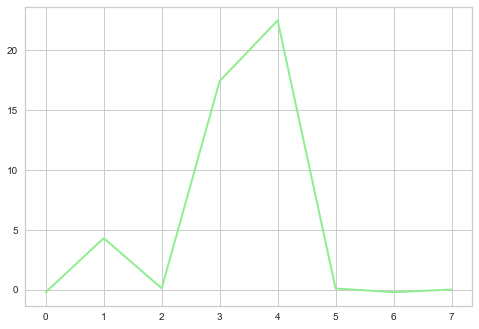

In [150]:
# Plotting enet coefficients to see their impace within model
plt.(rcv_model.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')

In [148]:
rcv_model.coef_

array([ -2.24771416e-01,   4.29056031e+00,   1.05194017e-01,
         1.74128845e+01,   2.24815772e+01,   8.49791158e-02,
        -2.21714948e-01,  -1.49080722e-04])

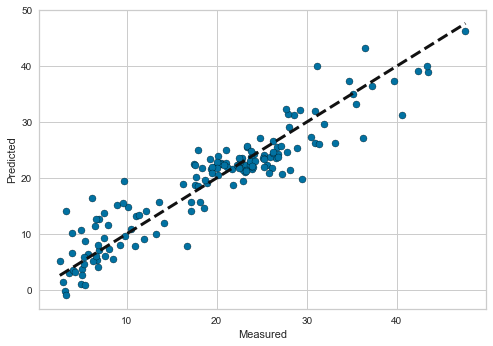

In [133]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:

fig2 = pylab.figure()

predicted = cross_val_predict(rcv_model, X, y, cv=100)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show();

In [134]:
fig2.savefig('./images/Pred_Measured.png')

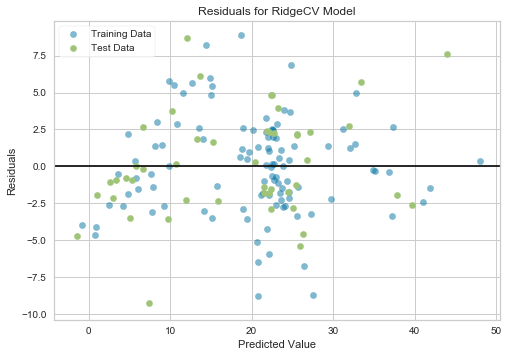

In [130]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import AlphaSelection
import pylab
fig1 = pylab.figure()

visualizer = ResidualsPlot(rcv_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()        

In [131]:
fig1.savefig('./images/resid_predicted.png')

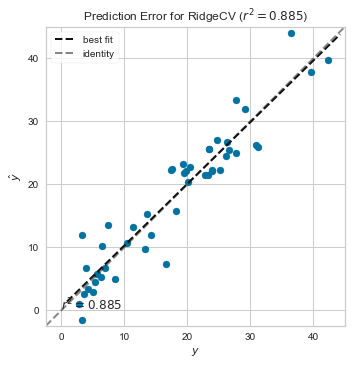

In [135]:
from yellowbrick.regressor import ManualAlphaSelection
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

fig3 = pylab.figure()

visualizer = PredictionError(rcv_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

In [136]:
fig3.savefig('./images/y_yhat.png')

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)
r^2 on test data : 0.371360


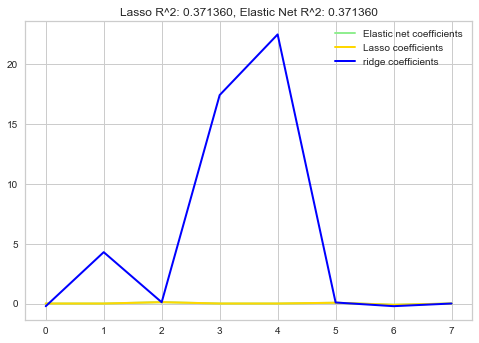

In [113]:
## Comparing Lasso,Ridge, E-net It appears Lasso model has drven most of my coefficients to 0 values 
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(rcv_model.coef_, color='blue', linewidth=2,
        label='ridge coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [167]:
X.columns

Index(['log(Imports)', 'log(GDPper_cap)', 'Insufficiently_active', 'Education',
       'Region_Oceania', 'ArabStates*Globalization', 'Asia*Globalization',
       'Europe*GDPpercap'],
      dtype='object')

In [155]:
rcv.coef_

array([ -2.24771416e-01,   4.29056031e+00,   1.05194017e-01,
         1.74128845e+01,   2.24815772e+01,   8.49791158e-02,
        -2.21714948e-01,  -1.49080722e-04])

In [181]:
d = {}
d["Log of Imports"] = -.225
d["Log of GDP Per Capita"] = 4.291
d["Insufficiently Active (%)"] = 0.105
d["Education"] = 17.41
d["Region is Oceania"] = 22.48
d['Globalizationin Arab States'] = -0.222
d["Globalization in Asian States"] = 0.085
d["GDP Per Capita in Europe"] = -.00015

In [201]:
Variable = ['Log of Imports', 'Log of GDP Per Capita', 'Insufficiently Active', 'Education', 'Region is Oceania', 'Globalization in Arab States','Globalization in Asia','GDP Per Capita in Europe']
Coefficient = [[-.225],[4.291],[0.105],[17.41],[22.48],[-.222],[0.085],[-.00015]]

In [207]:
df_vars = pd.DataFrame.from_dict(dictionary,orient='index')

In [202]:
dictionary = dict(zip(Variable, Coefficient))

In [226]:
df_vars

,0
Log of Imports,-0.22500
Log of GDP Per Capita,4.29100
Insufficiently Active,0.10500
Education,17.41000
Region is Oceania,22.48000
Globalization in Arab States,-0.22200
Globalization in Asia,0.08500
GDP Per Capita in Europe,-0.00015


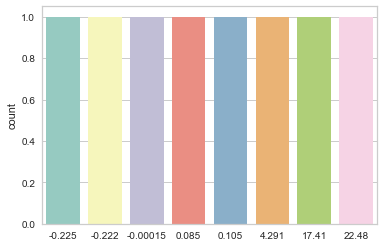

In [223]:
fig_vars = sns.countplot(x=df_vars[0].values, data=df_vars, palette="Set3")

In [225]:
df_ = df_.melt(df[0], var_name='cols',  value_name='Coefficient')
g = sns.factorplot(x="X_Axis", y="Coefficient", hue='cols', data=df_vars)

NameError: name 'df_' is not defined

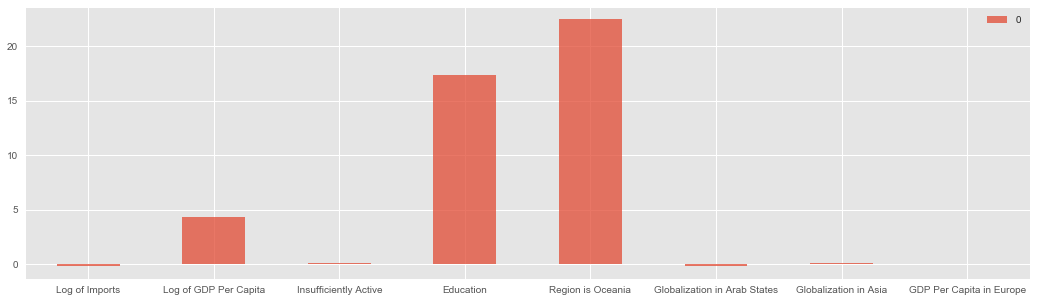

In [272]:
import matplotlib
Vars_vals = pylab.figure()
matplotlib.style.use('ggplot')
df_vars.plot(kind='bar',rot=0,alpha=.75, figsize = (18,5))
Vars_vals.savefig('Var_Values.png');

In [258]:
vars_.savefig('./images/Variable_Values.png')

AttributeError: 'NoneType' object has no attribute 'savefig'

In [259]:
vars_